# Numpy Arrays  
***  
## Numpy Array Attributes

In [135]:
import numpy as np

In [136]:
np.random.seed(0) # for reproducibility

x1 = np.random.randint(10, size = 6)       # one dimensional
x2 = np.random.randint(10, size = (3,4))   # two dimensional
x3 = np.random.randint(10, size = (3,4,5)) # three dimensional

Each array has attributes:  

* `ndim` (number of dimensions)  
* `shape` (size of each dimension)  
* `size` (total size of the array)  
* `dtype` (data type)  
* `itemsize` (bytes in each array element)  
* `nbytes` (total bytes in array)  

In [137]:
print("x3 ndim: ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size: ", x3.size)
print("x3 dtype: ", x3.dtype)
print("x3 itemsize: ", x3.itemsize)
print("x3 nbytes: ", x3.nbytes)

x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60
x3 dtype:  int32
x3 itemsize:  4
x3 nbytes:  240


***
## Array Indexing: Accessing Single Elements

In [138]:
x1

array([5, 0, 3, 3, 7, 9])

Access single elements by index.

In [139]:
x1[0]

5

In [140]:
x1[len(x1)-1]

9

Access single elements by negative index.

In [141]:
x1[-1]

9

In [142]:
x1[-2]

7

In a multidimensional array, access items via comma-separated tuples of indices.

In [143]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [144]:
x2[0,0]

3

In [145]:
x2[1,2]

8

You can also modify values using any of the above index notation.

In [146]:
x2[0,0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

Unlike Python lists, NumPy arrays have a fixed type. No upcasting!

In [147]:
x2[0,0] = 3.14519 # this will be truncated
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

***
## Array Slicing: Accessing Subarrays
### One dimensional arrays

Syntax is `x[start:stop:step]`.  

If any are missing, they default to `start = 0, stop = size of dimension, step = 1`.

In [148]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [149]:
x[:5] # first 5 elements

array([0, 1, 2, 3, 4])

In [150]:
x[5:] # elements after 5th index

array([5, 6, 7, 8, 9])

In [151]:
x[4:7] # middle subarray

array([4, 5, 6])

In [152]:
x[::2] # every other element

array([0, 2, 4, 6, 8])

In [153]:
x[1::2] # every other element starting at 1

array([1, 3, 5, 7, 9])

When step is negative, the start and stop defaults are swapped. This is a conventient way to reverse an array.

In [154]:
x[::-1] # reverse an array

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [155]:
x[5::-2] # starting at index 5, going backwards by 2

array([5, 3, 1])

### Multidimensional Arrays
Slicing works in the same way, with mutiple slices separted by commas.

In [156]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [157]:
x2[:2, :3] # two rows, three columns. equivalent to x2[:2:, :3:]

array([[3, 5, 2],
       [7, 6, 8]])

In [158]:
x2[:3, ::2] # all rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

Subarray dimensions can be reversed.

In [159]:
x2[::-1] # reverse rows

array([[1, 6, 7, 7],
       [7, 6, 8, 8],
       [3, 5, 2, 4]])

In [160]:
x2[::1, ::-1] # reverse columns

array([[4, 2, 5, 3],
       [8, 8, 6, 7],
       [7, 7, 6, 1]])

In [161]:
x2[::-1, ::-1] # reverse rows and columns

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

Accessing array rows and columns by combing and indexing and slicing.

In [162]:
print(x2[:, 0]) # first column of x2

[3 7 1]


In [163]:
print(x2[0, :]) # first row of x2

[3 5 2 4]


In the case of row indexing, the column index can be omitted.

In [164]:
x2[0] # first row, equivalent to x2[0, :]

array([3, 5, 2, 4])

In [165]:
x2[(0,1), :] # first two rows

array([[3, 5, 2, 4],
       [7, 6, 8, 8]])

### Subarrays as no-copy views

NumPy array slices return *views* rather and *copies* of data. By contrast, in regular Python list slicing, slices are copies.

In [166]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [167]:
x2_sub = x2[:2,:2] # extract a 2x2 subarray

In [168]:
x2_sub

array([[3, 5],
       [7, 6]])

Now if we modify this subarray, we'll see that the original array is changed!

In [169]:
x2_sub[0,0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [170]:
print(x2) # the original array is changed!!

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Creating copies of arrays

This is accomplished with the `copy()` method.

In [171]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


If we modify the copied subarray, the original array is not touched.

In [577]:
x2_sub_copy[0,0] = 42
print(x2_sub_copy)
print(x2)

[[42  5]
 [ 7  6]]
[99 99]


***  

## Reshaping of Arrays

Put the numbers 1-9 in a 3x3 grid. Use the `reshape()` method. This method doesn't make a copy of the data, so changes to the reshaped data result in changes to the original array.

In [173]:
grid = np.arange(1, 10)
grid2 = grid.reshape((3,3))
print(grid2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [174]:
# change an element of grid2, and grid is affected
grid2[0,0] = 99
print(grid)
print(grid2)

[99  2  3  4  5  6  7  8  9]
[[99  2  3]
 [ 4  5  6]
 [ 7  8  9]]


Convert a 1D array into a 2D row or column matrix with `reshape` or the `newaxis` keyword within a slice operation.

In [175]:
x = np.array([1,2,3])
print(x)
print(x.shape)

# row vector via reshape
print(x.reshape((1,3)))
x.reshape((1,3)).shape

[1 2 3]
(3,)
[[1 2 3]]


(1, 3)

In [176]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [177]:
# column vecotr via reshape
x.reshape((3,1))

array([[1],
       [2],
       [3]])

In [178]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

***  

## Array Concatenation and Splitting

All of the previous operations work on single arrays. It's also possible to combine many arrays into one, or split one into many.  

### Concatenation of arrays

Array concatenation in NumPy is primarily accomplished through the routines `np.concatenate`, `np.vstack`, `np.hstack`.

In [179]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x, y]) # similar to c() in R, but requires []

array([1, 2, 3, 3, 2, 1])

Can concatenate more than 2 arrays at once.

In [185]:
z = [99,99,99]
np.concatenate([x, y, z])

array([ 1,  2,  3,  3,  2,  1, 99, 99, 99])

`np.concatenate` can be used for 2D arrays.

In [186]:
grid = np.array([[1,2,3],
                 [4,5,6]])

# concatenate along the first axis
np.concatenate([grid, grid]) # default is `axis = 0` (up-down)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [192]:
# concatenate across the second axis (zero-indexed)
np.concatenate([grid, grid], axis = 1) # `axis = 1` (side-side)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can clearer to use `np.vstack` (vertical stack) and `np.hstack` (horizontal stack) functions:

In [217]:
x = np.array([1,2,3])
grid = np.array([[9,8,7],
                 [6,5,4]])

# vertially stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [218]:
# horizontally stack arrays
z = np.array([[99],
              [99]])

np.hstack([grid, z])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

### Splitting of arrays

The opposite of concatenation is splitting, implemented by the functions `np.split`, `np.hsplit`, and `np.vsplit`. For each, we pass a list of indices giving the split points.

In [249]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
print(x)

# split the array
x1, x2, x3 = np.split(x, [3,5]) # list of split points
print(x1, x2, x3)

[1, 2, 3, 99, 99, 3, 2, 1]
[1 2 3] [99 99] [3 2 1]


Note that *N* split points leads to *N + 1* subarrays. The related functions `np.hsplit` and `np.vsplit` are similar.

In [239]:
grid = np.arange(16).reshape((4,4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [242]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [255]:
right, left = np.hsplit(grid, [2])
print(right)
print(left)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


***  

## Computation on NumPy Arrays: Universal Functions

NumPy's *universal functions* use vectorization to make repeated calculations on NumPy array elements fast.  

### The slowness of loops

Consider computing the reciprocal of each element in the following array via a loop. 

In [258]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values)) # initalize blank array to fill
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return(output)

values = np.random.randint(1, 10, size = 5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [259]:
big_array = np.random.randint(1,100, size = 1000000) # one million elements
%timeit compute_reciprocals(big_array)

2.08 s ± 98.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


So slow!

### Introducing UFuncs

NumPy provides a convenient interface to this statically typed, compiled, and vectorized routine.

In [260]:
print(compute_reciprocals(values)) # loop
print(1 / values)                  # UFunc

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


In [261]:
# but how much faster are UFuncs it??
%timeit (1 / big_array)

8.12 ms ± 516 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


UFuncs are **orders of magnitude faster** than loops. We can use UFuncs to operate ararys on arrays.

In [266]:
np.arange(5) / np.arange(1,6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And UFuncs can operate on multidimensional arrays.

In [274]:
x = np.arange(9).reshape(3,3)
2 ** x # 2^x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

### Exploring NumPys UFuncs

UFuncs have two flavors: *unary ufuncs* which operate on a single input and *binary ufuncs* which operate on two inputs.

#### Array arithmetic

Standard addition, subtraction, division, multiplication.

In [285]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 5 =", x * 5)
print("x / 5 =", x / 5)
print("x // 5 =", x // 5) # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 5 = [ 0  5 10 15]
x / 5 = [0.  0.2 0.4 0.6]
x // 5 = [0 0 0 0]


There are also *unary ufuncs* for negation (`-`), a `**` operator for exponentation, and a `%` operator for modulus:

In [286]:
print("-x     =", -x)
print("x ** 2 =", x ** 5) # x^2
print("x % 2  =", x % 5)  # remainder after division of one number by another

-x     = [ 0 -1 -2 -3]
x ** 2 = [  0   1  32 243]
x % 2  = [0 1 2 3]


These can be string together, and the standard order of operations is respected.

In [290]:
-(0.5*x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

All of these arithmetic operations are simply wrapper around specific functions built into NumPy, for example, the `+` operator is a wrapper for the `add` function.

In [291]:
np.add(x, 2) # same as x + 2

array([2, 3, 4, 5])

#### Absolute value

NumPy understands Python's built-in `abs` function.

In [292]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

And the corresponding NumPy UFunc is `np.absolute`, also available under `np.abs`.

In [293]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [294]:
np.abs(x)

array([2, 1, 0, 1, 2])

#### Trigonometric Functions

Start by defining an array of angles.

In [295]:
theta = np.linspace(0, np.pi, 3)

Now we can compute some trigonometric functions on these values.

In [301]:
print("theta      =", theta)
print("sin(theta) =", np.sin(theta))
print("cos(theta) =", np.cos(theta))
print("tan(theta) =", np.tan(theta))

theta      = [0.         1.57079633 3.14159265]
sin(theta) = [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) = [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) = [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


Values are calculated to machine precision, so values that are analytically zero, instead show as being very close to zero.

In [303]:
x = [-1, 0, 1]
print("x         =", x)
print("arcsin(x) =", np.arcsin(x))
print("arccos(x) =", np.arccos(x))
print("arctan(x) =", np.arctan(x))

x         = [-1, 0, 1]
arcsin(x) = [-1.57079633  0.          1.57079633]
arccos(x) = [3.14159265 1.57079633 0.        ]
arctan(x) = [-0.78539816  0.          0.78539816]


#### Exponents and Logarithms

In [306]:
x = [1, 2, 3]
print("x   =", x)
print("e^x =", np.exp(x))
print("2^x =", np.exp2(x))
print("3^x =", np.power(3, x))

x   = [1, 2, 3]
e^x = [ 2.71828183  7.3890561  20.08553692]
2^x = [2. 4. 8.]
3^x = [ 3  9 27]


The inverse of exponentials, the logarithms, are also available. The basic `np.log` gives the natural logarithm, and base-2 and base-10 logs are also available.

In [315]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


There are specialized versions for maintaining precision with very small input.

In [316]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

exp(x) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) = [0.         0.0009995  0.00995033 0.09531018]


When x is very small, these functions give more precise values than if the raw `np.log` or `np.exp` were used.

#### Specialized UFuncs

Chances are that most functions you'll want to compute are in `scipy.special`. Here are a few examples that come up in a statistics context.

In [320]:
from scipy import special

In [321]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [327]:
# Error function (integral of Gaussian)
# its complement , and it inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)    =", special.erf(x))
print("erfc(x)   =", special.erfc(x))
print("erfinv(x) =", special.erfinv(x))

erf(x)    = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)   = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x) = [0.         0.27246271 0.73286908        inf]


### Advanced UFunc Features
#### Specifying Output

For all UFuncs, you can write the results directly to a location to be stored in memory, using the `out` argument of the function.

In [332]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out = y)
print(y)

[ 0. 10. 20. 30. 40.]


This can even ve used with array views. For example, we can write the results of a computation to every other element of a specified array.

In [336]:
y = np.zeros(10)
np.power(2, x, out = y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


If we had written `y[::2] = 2 ** x`, this would have resulted in the creation of a temporary array to hold the results of `2 ** x`, followed by a second operation copying those values into the `y` array. This doesn't make a difference for a small operation, but for large arrays the memory savings from careful use of the `out` argument can be significant.

In [347]:
w = np.arange(1000000)
z = np.empty(1000000)
%timeit np.multiply(w, 10, out = z)

1.67 ms ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [348]:
%timeit z = w * 10

3.89 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### Aggregates

For binary ufuncs, we can *reduce* an arry with a particular operation using the `reduce` method, which repeatedly applies a given operation to the elements of an array until only a single result remains.  

For example, calling `reduce` on a the `add` function returns the sum of all elements in the array.

In [351]:
x = np.arange(1, 6)
np.add.reduce(x)    # same as np.sum(x)

15

Similarly, calling `reduce` on `multiply` returns the prouce of all array elements.

In [356]:
np.multiply.reduce(x)  # same as np.product(x)

120

To store the intermediate results of the computation, use `accumulate`.

In [358]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [359]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120], dtype=int32)

Note that for these particular cases, there are dedicated NumPy functions to compute the results (`np.sum`, `np.prod`, `np.cumsum`,`np.cumprod`).  

#### Outer Products

Finally, any ufunc can compute the outer product of all pairs of two different inputs using the `outer` method. This allows you, in one line, to do things like create a multiplication table.

In [363]:
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

***  

## Aggregations: Min, Max, and Everything in Between  

### Summing the values in an array  

In [370]:
L = np.random.random(100)
sum(L) # python's built-in sum function

48.92747670226663

In [371]:
np.sum(L) # NumPy's function

48.92747670226664

Because it executes on compiled code, NumPy's implmentation of `sum` is much faster.

In [373]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

151 ms ± 8.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
546 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Moreover, the functions are not identical. Their optional arguments have different meanings, and `np.sum` is aware of multiple array dimensions, as we see in the following section.

### Maximum and Minimum

Similarly, Python and NumPy have max/min functions, and NumPy's corresponding functions are much quicker.

In [374]:
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [375]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [376]:
%timeit min(big_array)
%timeit np.min(big_array)

72.8 ms ± 5.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
339 µs ± 16.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For `min`, `max`, `sum`, andseveral other NumPy aggregates, a shorter syntax is to use methods of the array object itself:

In [377]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500214.0590864656


#### Multidimensional Aggregates

Aggregate along a row or column (as with `apply` in `R`). Say you have data in a 2D array.

In [392]:
M = np.random.random(12).reshape((3,4))
print(M)

[[0.00184047 0.2468008  0.62359438 0.34721627]
 [0.71277174 0.31563585 0.75975477 0.46296341]
 [0.72649532 0.49077071 0.42190859 0.28598556]]


By default, each NumPy aggregation function returns the aggregate over the entire array.

In [393]:
M.sum()  # same as np.sum(M)

5.395737859024655

Aggregation functions take an additional argument specifying the *axis* along which the aggregation is computed. For example, we find the minimum value within each column by specifying `axis = 0`.

In [404]:
M.min(axis = 0)

array([0.00184047, 0.2468008 , 0.42190859, 0.28598556])

Similarly, we can find the maximum valye within each row.

In [403]:
M.max(axis = 1)

array([0.62359438, 0.75975477, 0.72649532])

The way `axis` is specified here can be confusing for users coming from other languages. The `axis` keyword specifies **the dimension of the array that will be collapsed**, rather than the dimension that will be returned. So specifying `axis = 0` means that the first axis will be collapsed: for 2D arrays, this means that values within each column will be aggregated.  

***  

## Computation on Arrays: Broadcasting

UFuncs can be used to vectorize operations. Another means of vectorization is to use NumPy's **broadcasting** functionality. Broadcasting is a set of rules for applying binary ufuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.  

### Introducing Broadcasting

In [414]:
import numpy as np

In [415]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Broadcasting allows these types of binary operations to be preformed on arrays of different sizes--for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array.

In [416]:
a + 5

array([5, 6, 7])

We can think of this as an operation that stretches or duplicates the value `5` into the array `[5, 5, 5]` and adds the results. The advantage of NumPy is that broadcasting does not actually involve this duplication of values, but it's a useful mental model to think about broadcasting.  

Let's extend this to arrays of higher dimension by adding a one dimensional array to a two-dimensional array.

In [417]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [419]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here, the one-dimensional array is stretched, or broadcast, across the second dimension in order to match the shape of M.  

While these examples are easy to understand, more complicated cases can involve broacasting of both arrays. Consider:

In [432]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [433]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In this case, both arrays are stretched to match a common shape, resulting in a 2D array.

### Rules of Broadcasting

#### Broadcasting Example 1

Add a 2D array to a 1D array.

In [436]:
M = np.ones((2, 3))
a = np.arange(3)

print(M.shape)
print(a.shape)

(2, 3)
(3,)


In [437]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

#### Broadcasting Example 2

Broadcasting 2 arrays.

In [441]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

print(a.shape)
print(b.shape)

(3, 1)
(3,)


In [444]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

#### Broadcasting Example 3

Incompatabile arrays.

In [445]:
M = np.ones((3, 2))
a = np.arange(3)

print(M.shape)
print(a.shape)

(3, 2)
(3,)


In [446]:
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [447]:
a

array([0, 1, 2])

In [538]:
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### Broadcasting in Practice

#### Centering an Array

Consider an array of 10 observations, each with 3 values.

In [449]:
X = np.random.random((10, 3))

We compute the mean of each feature using the `mean` aggregate across the first dimension.

In [455]:
Xmean = X.mean(axis = 0)
Xmean

array([0.42215346, 0.49334768, 0.51038954])

And now we can center the `X` array by subtracting the mean (broadcasting).

In [456]:
X_centered = X - Xmean

to double check we've done this correctly, wecheck the centered array has near zero mean.

In [459]:
X_centered.mean(0) 

array([ 9.99200722e-17,  1.11022302e-16, -5.55111512e-17])

#### Plotting a two-dimensional function

One place broadcasting is sueful is in displaying images based on two-dimensional functions. If we define a function $z = f(x, y)$, broadcasting can be used tocompute the function across a grid.

In [469]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis] # same as .reshape((50, 1))

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We use Matplotlib to plot this 2D array.

In [472]:
%matplotlib inline
import matplotlib.pyplot as plt

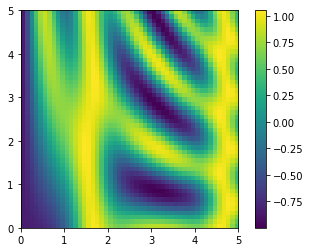

In [474]:
plt.imshow(z, origin = "lower", extent = [0, 5, 0, 5], cmap = "viridis")
plt.colorbar();

***  

## Comparisons, Masks, and Boolean Logic

Boolean masking is used to examine, extract, modify, or count values in an array based on some criterion.  

### Comparison Operators as UFuncs

`>`, `<`, `<=`, `>=`, `!=`, `==`

In [479]:
x = np.array(range(1, 6))
x

array([1, 2, 3, 4, 5])

In [480]:
x < 3

array([ True,  True, False, False, False])

In [481]:
x > 3

array([False, False, False,  True,  True])

In [482]:
x <= 3

array([ True,  True,  True, False, False])

In [483]:
x >= 3

array([False, False,  True,  True,  True])

In [485]:
x !=3

array([ True,  True, False,  True,  True])

In [486]:
x == 3

array([False, False,  True, False, False])

In [488]:
# also possible to do element-by-elemnt comparison of 2 arrays, and include compounds expressions
(2 * x) == (x **2)

array([False,  True, False, False, False])

Summary of comparison operators.  

| **operator** | **equivalent function**   |
|------|------|
|   `==`  | `np.equal` |
|   `!=`  | `np.not_equal` |
|   `<`  | `np.less` |
|   `<=`  | `np.less_equal` |
|   `>`  | `np.greater` |
|   `>=`  | `np.greater_equal` |

Just as arithmetic UFuncs, comparison operators work on arrays of any shape and size.

In [491]:
rng = np.random.RandomState(0) # methods for generating random numbers drawn from a variety of probability distributions
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [492]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

### Working with Boolean Arrays

Consider `x` from above.

In [493]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


#### Counting Entries

In [503]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [505]:
np.sum(x < 6) # False = 0, and True = 1

8

Benefit of `np.sum` is that like other NumPy aggregation functions, this summation can be done along rows or columns as well.

In [510]:
print(np.sum(x < 6, axis = 0)) # number of elements < 6 in each column
print(np.sum(x < 6, axis = 1)) # number of elements < 6 in each row

[2 2 2 2]
[4 2 2]


For quickly checking if any or all of the values are true, use `np.any()` and `np.all()`:

In [512]:
# any values greater than 8?
np.any(x > 8)

True

In [513]:
# any values less than 0?
np.any(x < 0)

False

In [514]:
# all values less than 10?
np.all(x < 10)

True

In [515]:
# all values equal to 6?
np.all(x == 6)

False

`np.any()` and `np.all()` can be used along axes as well:

In [517]:
# are all values within each row less than 8?
np.all(x < 8, axis = 1)

array([ True, False,  True])

#### Boolean Operators

`&`, `|`. `^` (xor), `~` (not)  

For example consider the compound question:  

In [536]:
np.random.seed(1)
x = np.random.normal(10, 3, 100) # mean = 10, sd = 3, 100 samples

In [537]:
np.sum((x > 7) & (x < 11))

55

We see that there are 55 observations that satisfy $7 < x < 11$.  

Summary of bitwise boolean operators.  

| **operator** | **equivalent function**   |
|------|------|
|   `&`  | `np.bitwise_and` |
|   <code> &#124;</code>  | `np.bitwise_or` |
|   `^`  | `np.bitwise_xor` |
|   `~`  | `np.bitwise_not` |

In [541]:
# equivalent statement
np.sum(~ ((x <= 7) | (x >= 11)) )

55

### Boolean Arrays as Masks

Use logical arrays to wubset full arrays.  

In [543]:
rng = np.random.RandomState(0) # methods for generating random numbers drawn from a variety of probability distributions
x = rng.randint(10, size = (3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [545]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Return a 1D array filled with values that meet this condition. 

In [546]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

***  

## Fancy Indexing  

Refers to indexing an array by passing it another array of indices.  

### Exploring Fancy Indexing

For example, consider the following array:  

In [579]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(low = 0, high = 100, size = 10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [563]:
# access 3 different elements
[x[3], x[7], x[2]]

[71, 86, 14]

In [568]:
# Alternatively, pass a single array of indices to obtain the same result
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

With fancy indexing, the shape of the result reflects the shape of the *indicex array* rather than the *array being indexed*:

In [566]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [567]:
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [594]:
# fancy indexing makes a copy of the data
y = x[ind] 
y[1] = 9999
y

array([  71, 9999,   14])

Fancy indexing works in multiple dimensions. Consider:

In [596]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [597]:
# standard indexing
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [598]:
# 2D results return the broadcasted shape of indices
X[row[:, np.newaxis], col] 

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [600]:
row[:, np.newaxis] * col # 2D shape

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

### Combined Indexing 

In [601]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [602]:
# combine fancy and simple indexing
X[2, [2, 0, 1]] 

array([10,  8,  9])

In [603]:
# combine fancy indexing and slicing
X[1: , [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [608]:
# combine fancy indexing and masking
mask = np.array([1, 0, 1, 0], dtype = bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [620]:
# I would probably just use:
X[:, mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Example: Selecting Random Points

One common use of fancy idexing is the selection of subsets of rows from a matrix.

In [636]:
mean = [0, 0]
cov  = [[1, 2],
        [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

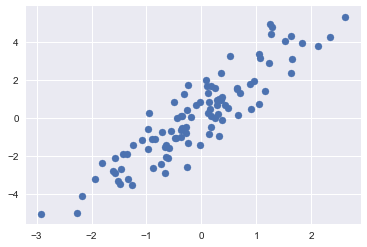

In [637]:
# visualize as scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # plot styling

plt.scatter(X[:, 0], X[:, 1]);

Let's use fancy indexing to select 20 random points. First chose 20 random indices with no repeats, then use those indices to select a portion of the original array.

In [703]:
#np.random.choice?
indices = np.random.choice(a = X.shape[0], size = 20, replace = False) # a = np.arange(1,101) also works. X.shape[0] = 100, whcih choice reads as 1:100
indices

array([96, 75, 74, 76, 39, 80, 34, 12, 60, 20, 51,  0, 86, 68, 99,  3, 31,
       82, 36, 50])

In [704]:
selection = X[indices]
selection.shape

(20, 2)

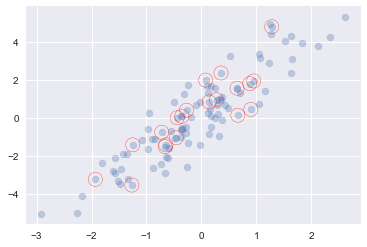

In [712]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.3)
plt.scatter(selection[:, 0], selection[:, 1], 
            facecolor = 'none', s = 200, color = "red");

### Modifying Values with Fancy Indexing

In [726]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [732]:
# accepts any assignment-type operator
x[i] -= 100 # c -= a is equivalent to c = c - a
print(x)

[  0 -99 -99   3 -99   5   6   7 -99   9]


Notice though, that repeated incides with these operations can cause some potentially unexpected results. Consider the following:

In [737]:
x = np.zeros(10)
x[[0,0]] = [4,6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign `x[0] = 4`, followed by `x[0] = 6`. The result is that `x[0]` contains the value `6`.  

Consider now this operation:  

In [738]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You might expect that `x[3]` contains the value 2, and `x[4]` contains the value 3, as this is the number of times each index is repeated. Why is this not the case? Conceptually, `x[i] += 1` is shorthand for `x[i] = x[i] + 1`. `x[i] = x[i] + 1` is evaluated, and then the result is assigned to the indices in `x`. With this in mind, it is not the augmentation that happens multiple times, but the assignment. That is to say that `x` is not incrementally copied into memory with new values after each assignment. The assignment happens on the original `x` each time.  

So what if you want the non-default behavior? You want the operation repeated rather than the assignment? For this, use the `at()` method of UFuncs.

In [739]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


### Example: Binning Data

You can use these dieas to effectively bin data into a histogram by hand. For example, imagine 1,00 values to bin:

In [772]:
np.random.seed(42)
x = np.random.randn(100)          # Return a sample (or samples) from the "standard normal" distribution.

# compute histogram by hand
bins  = np.linspace(-5, 5, 20)    # 20 values evenly spaced between -5 and 5
counts = np.zeros_like(bins)      # Return an array of zeros with the same shape and type as a given array.

# find approporate bin for each x
i = np.searchsorted(bins, x)      # find the index in `bins` that each element of `x` corresponds to

# add 1 to each of these bins
np.add.at(counts, i, 1)           # similar to R's table(i): how many values of each unique `i` are there?

In [770]:
#np.random.randn?
#np.zeros_like?
#np.searchsorted?

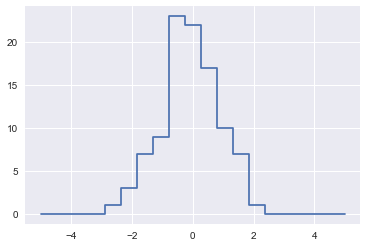

In [775]:
# plot results
plt.plot(bins, counts, linestyle = "steps")

Of course, this is silly. That's why we use `plt.hist()`.

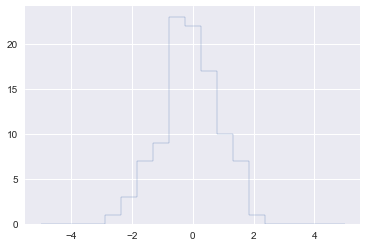

In [778]:
plt.hist(x, bins, histtype = "step");

Under the hood, matplotlib uses `np.histogram` to compute the binning. Let's compare to what we did before.

In [779]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
57.2 µs ± 396 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
16.1 µs ± 79.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


How is our simple routine faster? Look a little deeper into the documentation, and it's because the `np.histogram` code is doing something more sophistcated than the simple search and count we've done, and is designed for better performance when the number of data points is very large.

***

## Sorting Arrays

A simple **selection sort** repeatedly find the minimum value from a list, and makes swaps until the list is sorted. We can define this in a few lines of Python. 

In [796]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return(x)

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

The selection sort is useful for its simplicity, but it is much too slow to be useful for larger arrays. For a list of $N$ values, it requires $N$ loops, each of which does on the order of ~ $N$ comparison to find the swap value. In terms of $\mathcal{O}$ notation, selection sort averages $\mathcal{O}[N^2]$: if you double the number of items in the list, the execution time goes up by a factor of 4.  

Consider a very silly approach to sorting, the *bogsort*:  

In [798]:
def bogsort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return(x)

x = np.array([2, 1, 4, 5, 3])
bogsort(x)

array([1, 2, 3, 4, 5])

This silly method relies on pure chance to sort: it repeatedly applies a random shuffle of the array until the result happens tobe sorted. With an average scaling of $\mathcal{O}[N \: x \: N!]$ ($N$ times $N$ factorial), this should obviously never be used for any sort of computation.  

Python contains built-in sorting algorithms that are *much* more efficient than either of the simplistic algorithms just shown. 

### Fast Sorting in NumPy: np.sort and np.argsort

Python has built-in `sort` and `sorted` function to work with lists, but we don't discuss them because NumPy's `np.sort` function is much more efficient for our purposes. By deafult, `np.sort` uses an $\mathcal{O}[N \: log \: N]$, *quicksort* algorithm, through *mergesort* and *heapsort* are also available. For most applications, the default quicksort is more than sufficient.  

To return a sorted version of the array without modifying the input, use `np.sort`:

In [807]:
x = np.array([2, 1, 5, 4, 3])
np.sort(x)

array([1, 2, 3, 4, 5])

Can sort the array in-place:

In [808]:
x.sort()
x

array([1, 2, 3, 4, 5])

A related function is `argsort`, which instead returns a list of indicies of the sorted elements:

In [811]:
x = np.array([2, 1, 5, 4, 3])
i = np.argsort(x)
i

array([1, 0, 4, 3, 2], dtype=int64)

These indices can be used via fancy indexing to construct the desired array, or a portion of it.

In [819]:
print(x[i])
print(x[i[3:]])

[1 2 3 4 5]
[4 5]


#### Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional `axis` argument. For example:

In [824]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [827]:
# sort each column of X
np.sort(X, axis = 0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [829]:
# sort along each row of X
np.sort(X, axis = 1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that treats each row and column as an independent array, so relationships between rows and columns are lost!

### Partial Sorts: Partitioning

Sometimes we're no interested in sorting an entire array, but simply want to find the $K$ smallest values in the array. NumPy provides this in the `np.partition` function, which takes an arry and a number `K`. The result is a new array with the smallest `K` values to the left of the partition, and the rest of the values to the right, in arbitraty order.

In [831]:
x = np.array([7, 3, 2, 1, 6, 5, 4])
np.partition(x, 3)

array([3, 1, 2, 4, 6, 5, 7])

Notice that the first 3 values in the array are the smallest values, and to their right are the remaining values. Both sides of the partition are in unsorted, arbitraty order.  

We can also partition along an axis of a multidimensional array:

In [832]:
np.partition(X, 2, axis = 1) # partition along rows

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [835]:
np.partition(X, 2, axis = 0) # partition along columns

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

Finally, just as there is `np.argsort` that computes indices of the sort, there is `np.argpartition` that computes indices of the partition, which we view in the next section.

### Example: k-Nearest Neighbors

Let's use `argsort` along multiple axes to find the nearest neighbords of each point in a set. Start by creating a random set of 10 points on a 2D plane, arranged in a 10x2 array.

In [866]:
X = rand.rand(10, 2) # random values in a given shape drawn from uniform distribution 0-1
X

array([[0.60441738, 0.53984109],
       [0.20306122, 0.94285357],
       [0.59886547, 0.69478493],
       [0.88046784, 0.62435405],
       [0.29563369, 0.10549426],
       [0.45653457, 0.21844044],
       [0.41650995, 0.88328026],
       [0.32434502, 0.12208795],
       [0.35629784, 0.90682844],
       [0.27213225, 0.64769012]])

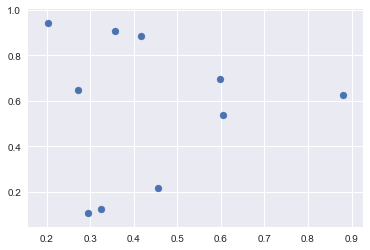

In [867]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:,1])

Now we compute the distance between each pair of points.

In [870]:
# putting it all together
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis = -1)
dist_sq

array([[0.        , 0.32350582, 0.02403842, 0.0833463 , 0.28400454,
        0.12516771, 0.15325966, 0.25295821, 0.19624302, 0.12204482],
       [0.32350582, 0.        , 0.21819905, 0.56032167, 0.70974028,
        0.58902312, 0.04910934, 0.68836596, 0.02477927, 0.09189227],
       [0.02403842, 0.21819905, 0.        , 0.08426041, 0.43921301,
        0.24716216, 0.06878402, 0.4033433 , 0.1038015 , 0.10897252],
       [0.0833463 , 0.56032167, 0.08426041, 0.        , 0.61124647,
        0.34448528, 0.28229971, 0.56154382, 0.35454597, 0.37061676],
       [0.28400454, 0.70974028, 0.43921301, 0.61124647, 0.        ,
        0.03864593, 0.61956213, 0.00109969, 0.64581661, 0.29452867],
       [0.12516771, 0.58902312, 0.24716216, 0.34448528, 0.03864593,
        0.        , 0.44361396, 0.02675788, 0.48392545, 0.21825951],
       [0.15325966, 0.04910934, 0.06878402, 0.28229971, 0.61956213,
        0.44361396, 0.        , 0.5879081 , 0.00418002, 0.07634763],
       [0.25295821, 0.68836596, 0.4033433

In [872]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

It checks out. Use `np.argsort` to find the indices of the nearest neighbors. Leftmost column gives index of nearest neighbor.

In [875]:
nearest = np.argsort(dist_sq, axis = 1)
nearest

array([[0, 2, 3, 9, 5, 6, 8, 7, 4, 1],
       [1, 8, 6, 9, 2, 0, 3, 5, 7, 4],
       [2, 0, 6, 3, 8, 9, 1, 5, 7, 4],
       [3, 0, 2, 6, 5, 8, 9, 1, 7, 4],
       [4, 7, 5, 0, 9, 2, 3, 6, 8, 1],
       [5, 7, 4, 0, 9, 2, 3, 6, 8, 1],
       [6, 8, 1, 2, 9, 0, 3, 5, 7, 4],
       [7, 4, 5, 0, 9, 2, 3, 6, 8, 1],
       [8, 6, 1, 9, 2, 0, 3, 5, 7, 4],
       [9, 8, 6, 1, 2, 0, 5, 7, 4, 3]], dtype=int64)

First column is 1-9, because each point is closest to itself. We actaully only need the closest 2 distances, so we use `np.argpartition`:

In [876]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis = 1)

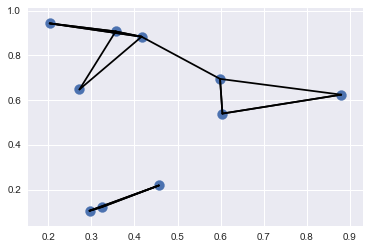

In [881]:
plt.scatter(X[:, 0], X[:, 1], s = 100) 

# draw lines from each point to its two nearest neighbors

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color = "black")

In practice, to find nearest neighbords, there aremuch more efficient algorithms than this brute-force one. One example is the KD-tree in Scikit-Learn.

***  

### Structured Data: NumPy's Structured Arrays

**structure arrays** and **record arrays**: efficient sotrage for compound, heterogeneous data. While these examples are useful for simple operations, scenarios like these often lend themselves to the use of Pandas `DataFrames`, explored in Chapter 3.  

Imagine:  

In [882]:
name   = ["Alice", "Bob", "Cathy", "Doug"]
age    = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

Nothing here tells us that the three arrays are related. Better if we could use a single structure to store all of this data.

In [884]:
# simple array
x = np.zeros(4, dtype = int)

# compound data type
data = np.zeros(4, dtype={"names":("name","age","weight"),
                          "formats":("U10","i4","f8")})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


* `U10` = unicode string of max length 10  
* `i4`  = 4 byte (32 bit) integer  
* `f8`  = 8 byte (64 bit) float  

Now fill the empty container.

In [885]:
data["name"] = name
data["age"]  = age
data["weight"] = weight
print(data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


In [886]:
# get all names
data["name"]

array(['Alice', 'Bob', 'Cathy', 'Doug'], dtype='<U10')

In [887]:
# get first row of data
data[0]

('Alice', 25, 55.)

In [888]:
# get name from last row
data[-1]["name"]

'Doug'

There are 3 more pages here on using structured arrays in NumPy, but they are skipped. Day-to-day use of structured data is more easily dealt with in Pandas. 